In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_context('notebook')
from scipy.optimize import curve_fit

### Import data

In [5]:
data3 = pd.read_excel('../data/RainfallData.xlsx', sheet_name='Exercise_003', index_col=0)
data3.head()

,A,B,C,D,E
Year,,,,,
1926,39.75,45.70,30.69,37.36,32.85
1927,39.57,38.52,40.99,30.87,28.08
1928,42.01,48.26,40.44,42.00,33.51
1929,41.39,34.64,32.49,39.92,29.58
1930,31.55,45.13,36.72,36.32,23.76


In [6]:
gages = data3.columns

In [7]:
# average precipitation
data3['AVG'] = data3.mean(axis=1)
data3.head()

,A,B,C,D,E,AVG
Year,,,,,,
1926,39.75,45.70,30.69,37.36,32.85,37.270
1927,39.57,38.52,40.99,30.87,28.08,35.606
1928,42.01,48.26,40.44,42.00,33.51,41.244
1929,41.39,34.64,32.49,39.92,29.58,35.604
1930,31.55,45.13,36.72,36.32,23.76,34.696


### Double-mass curve

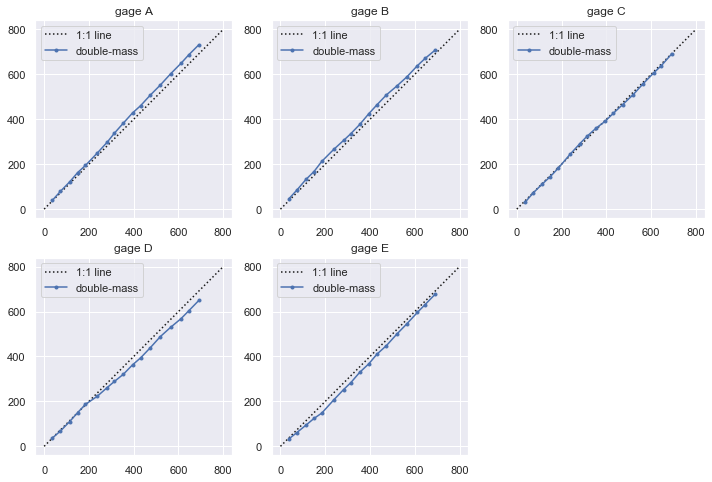

In [19]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

for (gage, ax) in zip(gages, axes.flatten()):
    # line of slope 1
    ax.plot((0, 800), (0, 800), ':k', label='1:1 line')
    # double-mass curve
    ax.plot(data3.AVG.cumsum(), data3[gage].cumsum(), '.-', label='double-mass')
    ax.set_title('gage ' + gage)
    ax.legend()
    
axes[1, 2].axis('off');

### Identify errors

In [20]:
def linear_reg(x, m):
    """Linear regression with intercept 0
        y = m * x
    """
    
    y = m * x
    
    return y

#### Example: gage A

In [42]:
# define the gage
gage = 'A'

In [43]:
# define an error threshold
error = .1

In [44]:
for year in data3.index[3:-3]:
    # fit the regression for the previous series
    m1 = curve_fit(linear_reg, data3.loc[:year, 'AVG'].cumsum(), data3.loc[:year, gage].cumsum())[0][0]
    # fit the regression for the posterior series
    m2 = curve_fit(linear_reg, data3.loc[year:, 'AVG'].cumsum(), data3.loc[year:, gage].cumsum())[0][0]
    if abs(m1 - m2) > error:
        print(year, m1, m2)

#### Loop for all gages


In [45]:
def identify_errors(dataGage, dataAVG, error=.1):
    """Identify possible break points in the double-mass curve
    
    Inputs:
    -------
    
    Outputs:
    --------
    """
    
    for year in data3.index[3:-3]:
        # fit the regression for the previous series
        m1 = curve_fit(linear_reg, dataAVG.loc[:year].cumsum(), dataGage.loc[:year].cumsum())[0][0]
        # fit the regression for the posterior series
        m2 = curve_fit(linear_reg, dataAVG.loc[year:].cumsum(), dataGage.loc[year:].cumsum())[0][0]
        if abs(m1 - m2) > error:
            print(year, m1, m2)

In [46]:
gages

Index(['A', 'B', 'C', 'D', 'E'], dtype='object')

In [47]:
for gage in gages:
    print('Gage ', gage)
    identify_errors(data3.AVG, data3[gage], error=.1)
    print()

Gage  A

Gage  B
1929 0.8777898574805245 0.9814658605805845
1930 0.8737648199459143 0.9777338149843993
1931 0.8825679313126092 1.0060255545942274
1932 0.8966075731286767 1.0072111251935532
1936 0.9220787615859858 1.0280146352940291
1937 0.92402690228904 1.0542454476658296
1938 0.9290199773608097 1.08427694789212
1939 0.9348126625133791 1.0511107660507235

Gage  C

Gage  D
1930 1.0039222717189282 1.1068008588816314

Gage  E
1929 1.2034774389394798 1.002360191407962
1930 1.2225413016468873 0.9857072009680922
1931 1.190773192770672 0.9543121230643331
1932 1.1606873544283185 0.962358285811209
1933 1.1434258126210066 0.9633811726854362
1934 1.121884732623081 0.9537334083626715
1935 1.1084874653930326 0.9710936024098545
1936 1.0934854083246428 0.9537552392531501
1937 1.084621853877499 0.9776589049457964
1938 1.074688009371437 0.9453987190577559
1939 1.0663083668473186 0.9621130710976962



We have identified errors in gages B, D and E

### Correct series
#### Gage B
##### Analyse the series

In [48]:
# set gage and break points
gage = 'B'
breaks = [1929, 1939]

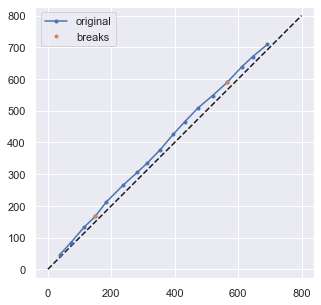

In [52]:
# plot
plt.figure(figsize=(5, 5))
plt.axis('equal')
plt.plot((0, 800), (0, 800), '--k')
plt.plot(data3.AVG.cumsum(), data3[gage].cumsum(), '.-', label='original')
plt.plot(data3.AVG.cumsum().loc[breaks], data3[gage].cumsum().loc[breaks], '.', label='breaks')
plt.legend();

In [53]:
# reset the break points
breaks = [1930, 1938]

In [55]:
# fit the regression before the first break point
m1 = curve_fit(linear_reg, data3.loc[:breaks[0], 'AVG'].cumsum(), data3.loc[:breaks[0], gage].cumsum())[0][0]
# fit the regression between break points
m2 = curve_fit(linear_reg, data3.loc[breaks[0]:breaks[1], 'AVG'].cumsum(), data3.loc[breaks[0]:breaks[1], gage].cumsum())[0][0]
# fit the regression after the second break point
m3 = curve_fit(linear_reg, data3.loc[breaks[1]:, 'AVG'].cumsum(), data3.loc[breaks[1]:, gage].cumsum())[0][0]
m1, m2, m3

(1.1440964837032106, 1.0445162956797596, 0.9218205135878637)

##### Correct the series

In [56]:
# correction factors
factor12 = m2 / m1
factor23 = m2 / m3

factor12, factor23

(0.9129617218111449, 1.133101596550879)

In [57]:
# copy the original series
data3['B_'] = data3[gage].copy()

In [58]:
# correct the period before the first break
data3.loc[:breaks[0], 'B_'] *= factor12

In [59]:
# correct the period after the second break
data3.loc[breaks[1]:, 'B_'] *= factor23

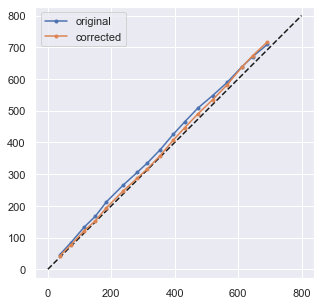

In [60]:
# plot
plt.figure(figsize=(5, 5))
plt.axis('equal')
plt.plot((0, 800), (0, 800), '--k')
plt.plot(data3.AVG.cumsum(), data3[gage].cumsum(), '.-', label='original')
plt.plot(data3.AVG.cumsum(), data3[gage + '_'].cumsum(), '.-', label='corrected')
plt.legend();

In [61]:
# check again for errors
identify_errors(data3.B_, data3.AVG)

#### Gage D
##### Analyse the series

In [62]:
gage = 'D'
breaks = [1930]

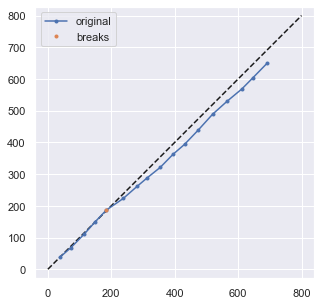

In [63]:
# plot
plt.figure(figsize=(5, 5))
plt.axis('equal')
plt.plot((0, 800), (0, 800), '--k')
plt.plot(data3.AVG.cumsum(), data3[gage].cumsum(), '.-', label='original')
plt.plot(data3.AVG.cumsum().loc[breaks], data3[gage].cumsum().loc[breaks], '.', label='breaks')
plt.legend();

In [64]:
# fit the regression before the first break point
m1 = curve_fit(linear_reg, data3.loc[:breaks[0], 'AVG'].cumsum(), data3.loc[:breaks[0], gage].cumsum())[0][0]
# fit the regression after the break point
m2 = curve_fit(linear_reg, data3.loc[breaks[0]:, 'AVG'].cumsum(), data3.loc[breaks[0]:, gage].cumsum())[0][0]
m1, m2

(0.9955705188733881, 0.9028782306840173)

##### Correct the series

In [66]:
# correction factor
factor = m1 / m2
factor

1.1026631111918022

In [67]:
# copy of the original data
data3[gage + '_'] = data3[gage].copy()
# correct period after the break
data3.loc[breaks[0]:, gage + '_'] *= factor

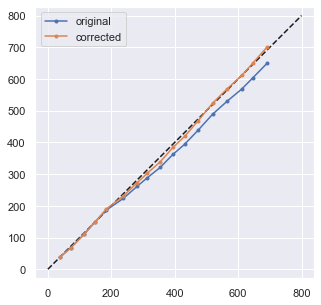

In [68]:
# plot
plt.figure(figsize=(5, 5))
plt.axis('equal')
plt.plot((0, 800), (0, 800), '--k')
plt.plot(data3.AVG.cumsum(), data3[gage].cumsum(), '.-', label='original')
plt.plot(data3.AVG.cumsum(), data3[gage + '_'].cumsum(), '.-', label='corrected')
plt.legend();

In [69]:
# check for errors
identify_errors(data3[gage + '_'], data3.AVG)

1935 0.9714714240227482 1.0752368911123598
1937 0.9751004323768547 1.0867213735471264


In [70]:
gage = 'D_'
breaks = [1935]

In [71]:
# fit the regression before the first break point
m1 = curve_fit(linear_reg, data3.loc[:breaks[0], 'AVG'].cumsum(), data3.loc[:breaks[0], gage].cumsum())[0][0]
# fit the regression after the break point
m2 = curve_fit(linear_reg, data3.loc[breaks[0]:, 'AVG'].cumsum(), data3.loc[breaks[0]:, gage].cumsum())[0][0]
m1, m2

(0.9714714240227482, 1.0752368911123598)

In [72]:
# correction factor
factor = m1 / m2
factor

0.9034952502585142

In [73]:
# copy of the original data
data3[gage + '_'] = data3[gage].copy()
# correct period after the break
data3.loc[breaks[0]:, gage + '_'] *= factor

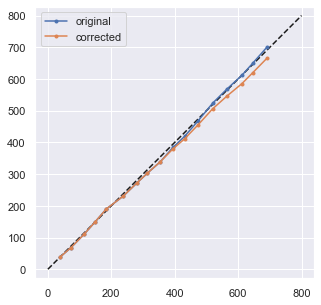

In [74]:
# plot
plt.figure(figsize=(5, 5))
plt.axis('equal')
plt.plot((0, 800), (0, 800), '--k')
plt.plot(data3.AVG.cumsum(), data3[gage].cumsum(), '.-', label='original')
plt.plot(data3.AVG.cumsum(), data3[gage + '_'].cumsum(), '.-', label='corrected')
plt.legend();

In [75]:
# check for errors
identify_errors(data3[gage + '_'], data3.AVG)

#### Gage E
##### Analyse the series

In [81]:
gage = 'E'
breaks = [1930]

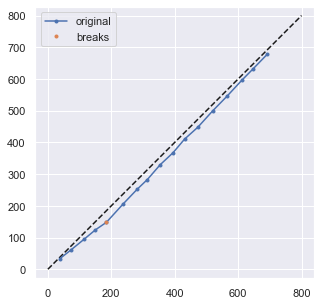

In [82]:
# plot
plt.figure(figsize=(5, 5))
plt.axis('equal')
plt.plot((0, 800), (0, 800), '--k')
plt.plot(data3.AVG.cumsum(), data3[gage].cumsum(), '.-', label='original')
plt.plot(data3.AVG.cumsum().loc[breaks], data3[gage].cumsum().loc[breaks], '.', label='breaks')
plt.legend();

In [83]:
# fit the regression before the first break point
m1 = curve_fit(linear_reg, data3.loc[:breaks[0], 'AVG'].cumsum(), data3.loc[:breaks[0], gage].cumsum())[0][0]
# fit the regression after the break point
m2 = curve_fit(linear_reg, data3.loc[breaks[0]:, 'AVG'].cumsum(), data3.loc[breaks[0]:, gage].cumsum())[0][0]
m1, m2

(0.8176415003641067, 1.0142506420191348)

##### Correct the series

In [84]:
# correction factor
factor = m2 / m1

In [85]:
# copy of the original data
data3[gage + '_'] = data3[gage].copy()
# correct
data3.loc[:breaks[0], gage + '_'] *= factor

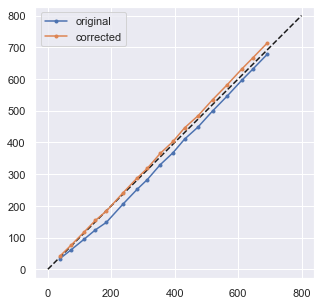

In [86]:
# plot
plt.figure(figsize=(5, 5))
plt.axis('equal')
plt.plot((0, 800), (0, 800), '--k')
plt.plot(data3.AVG.cumsum(), data3[gage].cumsum(), '.-', label='original')
plt.plot(data3.AVG.cumsum(), data3[gage + '_'].cumsum(), '.-', label='corrected')
plt.legend();

In [87]:
# check for errors
identify_errors(data3[gage + '_'], data3.AVG)

#### Redraw the double-mass plot

In [88]:
gages = ['A', 'B_', 'C', 'D__', 'E_']
data3['AVG_'] = data3[gages].mean(axis=1)
data3.head()

,A,B,C,D,E,AVG,B_,D_,D__,E_,AVG_
Year,,,,,,,,,,,
1926,39.75,45.70,30.69,37.36,32.85,37.270,41.722351,37.360000,37.360000,40.749073,38.054285
1927,39.57,38.52,40.99,30.87,28.08,35.606,35.167286,30.870000,30.870000,34.832085,36.285874
1928,42.01,48.26,40.44,42.00,33.51,41.244,44.059533,42.000000,42.000000,41.567776,42.015462
1929,41.39,34.64,32.49,39.92,29.58,35.604,31.624994,39.920000,39.920000,36.692773,36.423553
1930,31.55,45.13,36.72,36.32,23.76,34.696,41.201963,40.048724,40.048724,29.473302,35.798798


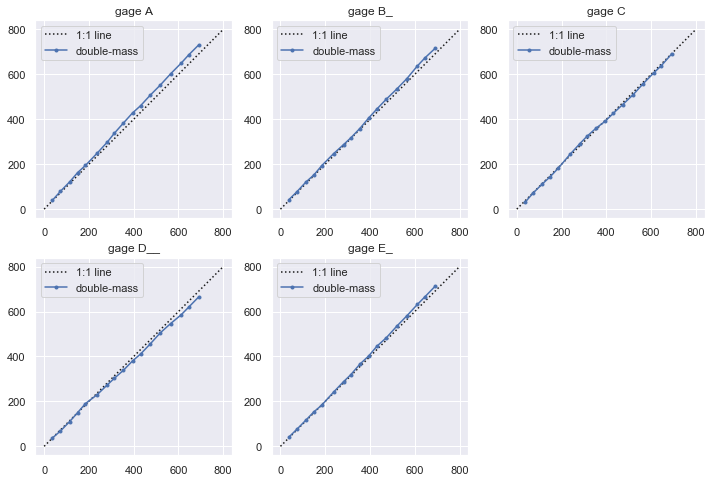

In [89]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

for (gage, ax) in zip(gages, axes.flatten()):
    # line of slope 1
    ax.plot((0, 800), (0, 800), ':k', label='1:1 line')
    # double-mass curve
    ax.plot(data3.AVG.cumsum(), data3[gage].cumsum(), '.-', label='double-mass')
    ax.set_title('gage ' + gage)
    ax.legend()
    
axes[1, 2].axis('off');

In [92]:
# export corrected series
data3_ = data3.loc[:, gages]
data3_.columns = ['A', 'B', 'C', 'D', 'E']

data3_.to_csv('../output/Ex3_corrected series.csv', float_format='%.2f')